In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as mb

In [26]:
dbdir = '/astro/store/pogo4/opsim/fbs_db/fbs_1.4/AGN_DDF/'
runname = 'agnddf_v1.4_10yrs'

opsdb = db.OpsimDatabase(os.path.join(dbdir, runname + '.db'))

In [14]:
# What are the DD fields? (let's calculate metrics per field individually)
propInfo, propTags = opsdb.fetchPropInfo()
propInfo

{0: 'Other',
 1: 'WFD',
 2: 'DD:COSMOS',
 3: 'DD:ECDFS',
 4: 'DD:290',
 5: 'DD:XMM-LSS',
 6: 'DD:ELAISS1'}

In [15]:
filterlist = ('u', 'g', 'r', 'i', 'z', 'y')
ddfields = [ddf for ddf in propInfo.values() if ddf.startswith('DD')]
propids = [k for k, v in propInfo.items() if v.startswith('DD')]
print(filterlist, ddfields, propids)

('u', 'g', 'r', 'i', 'z', 'y') ['DD:COSMOS', 'DD:ECDFS', 'DD:290', 'DD:XMM-LSS', 'DD:ELAISS1'] [2, 3, 4, 5, 6]


In [29]:
bundles = {}
m = metrics.CountMetric('observationStartMJD')
cols = ['fiveSigmaDepth', 'airmass', 'skyBrightness', 'seeingFwhmEff']
for ddf, propid in zip(ddfields, propids):
    for f in filterlist:
        sql = f'proposalId=="{propid}" and filter == "{f}"'
        for col in cols:
            s = slicers.OneDSlicer(col)
            meta = f'{ddf} in {f}: {col}'
            bundles[meta] = mb.MetricBundle(m, s, sql)

In [30]:
g = mb.MetricBundleGroup(bundles, opsdb)
g.runAll()

Querying database SummaryAllProps with constraint proposalId=="4" and filter == "u" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']
Found 1328 visits
Running:  ['DD:290 in u: fiveSigmaDepth']
Completed metric generation.
Running:  ['DD:290 in u: airmass']
Completed metric generation.
Running:  ['DD:290 in u: skyBrightness']
Completed metric generation.
Running:  ['DD:290 in u: seeingFwhmEff']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId=="5" and filter == "g" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']
Found 770 visits
Running:  ['DD:XMM-LSS in g: fiveSigmaDepth']
Completed metric generation.
Running:  ['DD:XMM-LSS in g: airmass']
Completed metric generation.
Running:  ['DD:XMM-LSS in g: skyBrightness']
Completed metric generation.
Running:  ['DD:XMM-LSS in g: seeingFwhmEff']

Found 844 visits
Running:  ['DD:ECDFS in g: fiveSigmaDepth']
Completed metric generation.
Running:  ['DD:ECDFS in g: airmass']
Completed metric generation.
Running:  ['DD:ECDFS in g: skyBrightness']
Completed metric generation.
Running:  ['DD:ECDFS in g: seeingFwhmEff']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId=="2" and filter == "i" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']
Found 2304 visits
Running:  ['DD:COSMOS in i: fiveSigmaDepth']
Completed metric generation.
Running:  ['DD:COSMOS in i: airmass']
Completed metric generation.
Running:  ['DD:COSMOS in i: skyBrightness']
Completed metric generation.
Running:  ['DD:COSMOS in i: seeingFwhmEff']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId=="4" and filter == "z" fo

In [27]:
wbundles = {}
m = metrics.CountMetric('observationStartMJD')
cols = ['fiveSigmaDepth', 'airmass', 'skyBrightness', 'seeingFwhmEff']
for f in filterlist:
    sql = f'proposalId==1 and filter == "{f}"'
    for col in cols:
        s = slicers.OneDSlicer(col)
        meta = f'WFD in {f}: {col}'
        wbundles[meta] = mb.MetricBundle(m, s, sql)

In [28]:
g = mb.MetricBundleGroup(wbundles, opsdb)
g.runAll()

Querying database SummaryAllProps with constraint proposalId==1 and filter == "u" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']
Found 119679 visits
Running:  ['WFD in u: fiveSigmaDepth']
Completed metric generation.
Running:  ['WFD in u: airmass']
Completed metric generation.
Running:  ['WFD in u: skyBrightness']
Completed metric generation.
Running:  ['WFD in u: seeingFwhmEff']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId==1 and filter == "y" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']


/ssd/lsst/lsst_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 384 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Found 373082 visits
Running:  ['WFD in y: fiveSigmaDepth']
Completed metric generation.
Running:  ['WFD in y: airmass']
Completed metric generation.
Running:  ['WFD in y: skyBrightness']
Completed metric generation.
Running:  ['WFD in y: seeingFwhmEff']


/ssd/lsst/lsst_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 511 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId==1 and filter == "r" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']
Found 394426 visits
Running:  ['WFD in r: fiveSigmaDepth']
Completed metric generation.
Running:  ['WFD in r: airmass']
Completed metric generation.
Running:  ['WFD in r: skyBrightness']
Completed metric generation.
Running:  ['WFD in r: seeingFwhmEff']


/ssd/lsst/lsst_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 530 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId==1 and filter == "g" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']
Found 164400 visits
Running:  ['WFD in g: fiveSigmaDepth']
Completed metric generation.
Running:  ['WFD in g: airmass']
Completed metric generation.
Running:  ['WFD in g: skyBrightness']
Completed metric generation.
Running:  ['WFD in g: seeingFwhmEff']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId==1 and filter == "i" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']


/ssd/lsst/lsst_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 474 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


Found 397935 visits
Running:  ['WFD in i: fiveSigmaDepth']
Completed metric generation.
Running:  ['WFD in i: airmass']
Completed metric generation.
Running:  ['WFD in i: skyBrightness']
Completed metric generation.
Running:  ['WFD in i: seeingFwhmEff']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database SummaryAllProps with constraint proposalId==1 and filter == "z" for columns ['airmass', 'observationStartMJD', 'skyBrightness', 'fiveSigmaDepth', 'seeingFwhmEff']
Found 358231 visits
Running:  ['WFD in z: fiveSigmaDepth']
Completed metric generation.
Running:  ['WFD in z: airmass']
Completed metric generation.
Running:  ['WFD in z: skyBrightness']
Completed metric generation.
Running:  ['WFD in z: seeingFwhmEff']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/ssd/lsst/lsst_repos/sims_maf/python/lsst/sims/maf/utils/mafUtils.py:58: UserWarning: Optimal bin calculation tried to make 863 bins, returning 200
  warnings.warn('Optimal bin calculation tried to make %.0f bins, returning %i'%(nbins, nbinMax))


In [52]:
ph = plots.PlotHandler()

In [71]:
# let's divide all of the metric values by their max value so that we can plot them on the same scale
for b in bundles:
    maxV = bundles[b].metricValues.max()
    bundles[b].summaryValues['max'] = maxV
    bundles[b].metricValues = bundles[b].metricValues / maxV

for b in wbundles:
    maxV = wbundles[b].metricValues.max()
    wbundles[b].summaryValues['max'] = maxV
    wbundles[b].metricValues = wbundles[b].metricValues / maxV

In [80]:
filtercolors = {'u': 'cyan', 'g': 'lightgreen', 'r': 'orange', 'i':'yellow', 'z': 'red', 'y': 'magenta'}
for b in bundles:
    f  = b.split(':')[1][-1]
    bundles[b].setPlotDict({'color': filtercolors[f], 'label': b})
for w in wbundles:
    f = w.split(':')[0][-1]
    wbundles[w].setPlotDict({'color': filtercolors[f], 'label': w, 'linestyle': ':'})

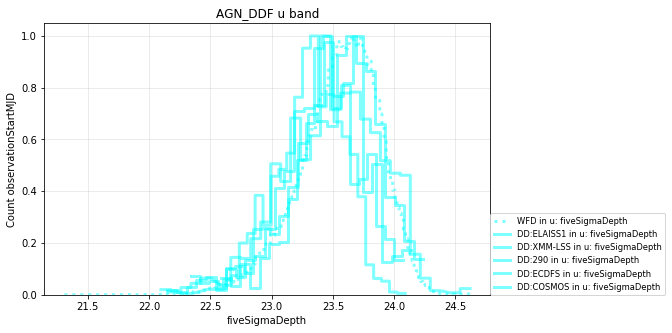

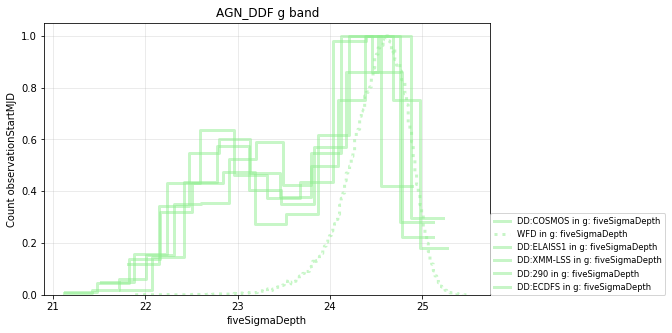

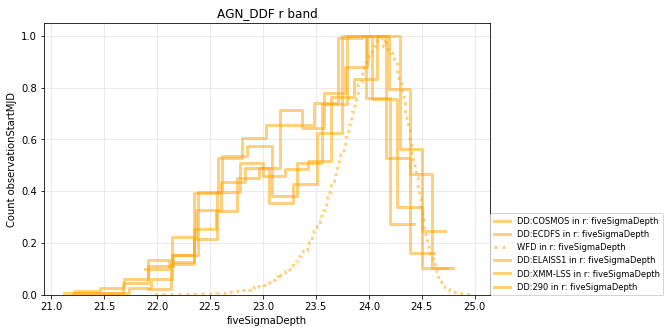

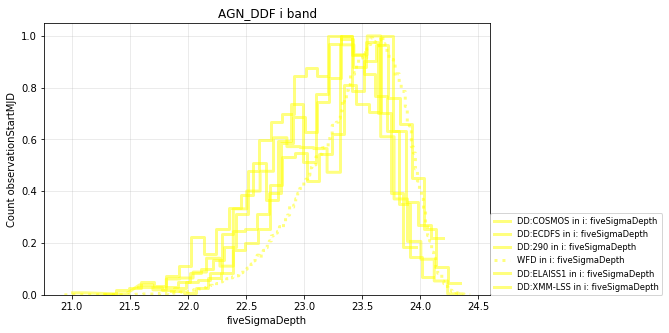

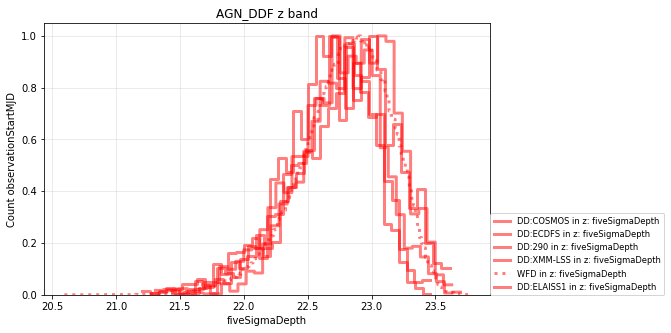

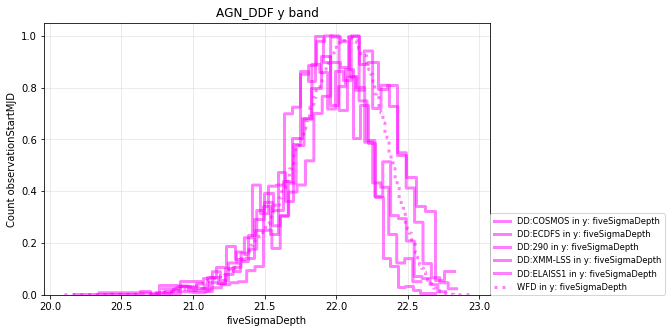

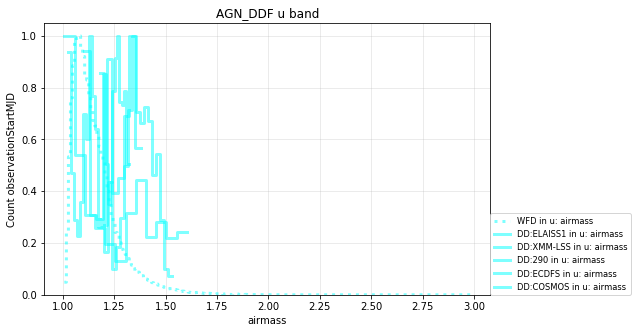

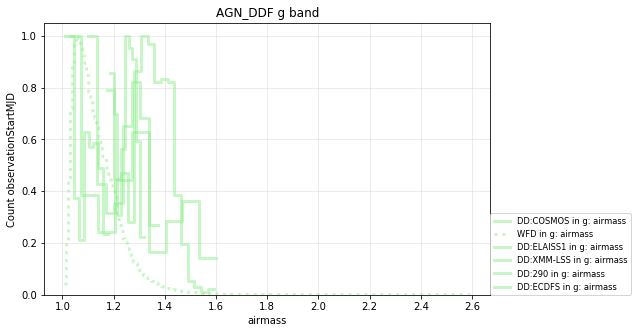

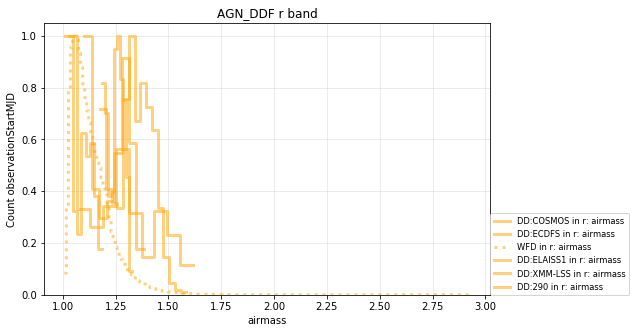

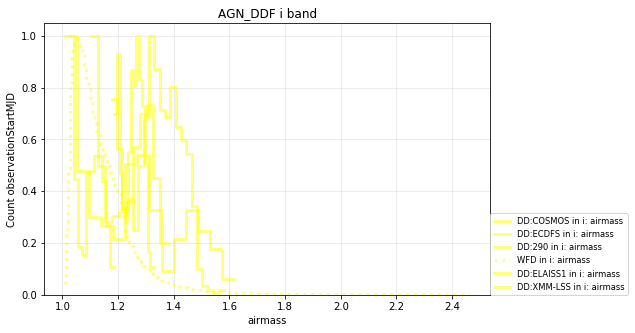

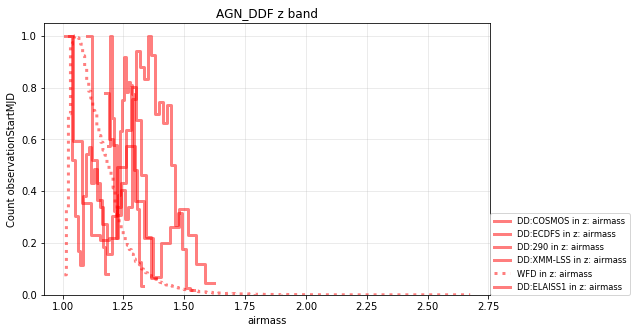

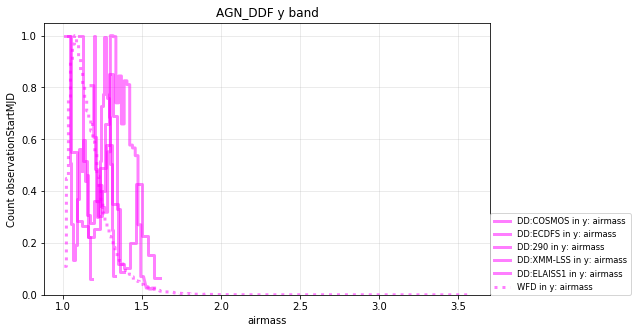

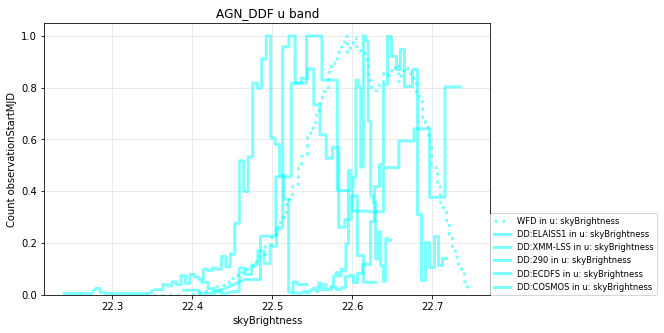

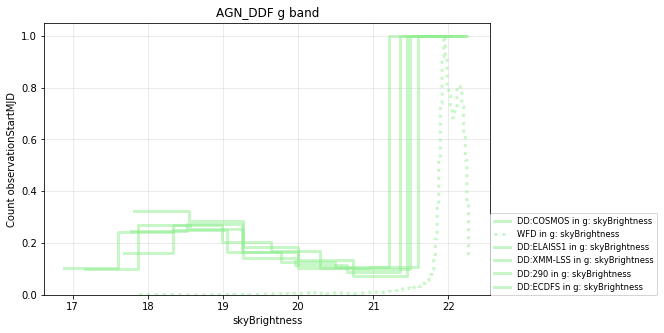

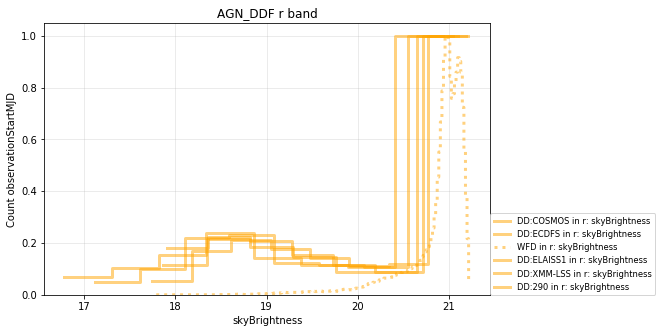

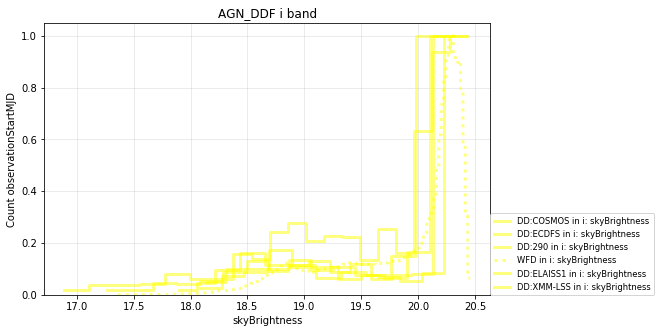

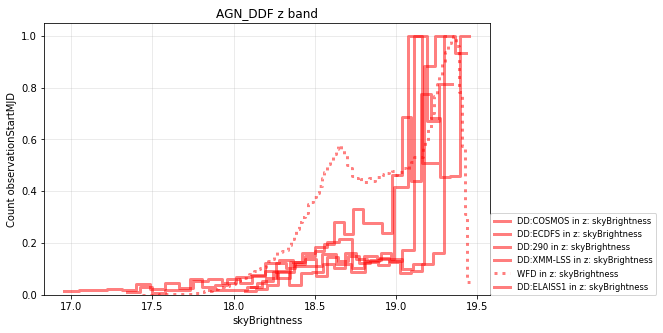

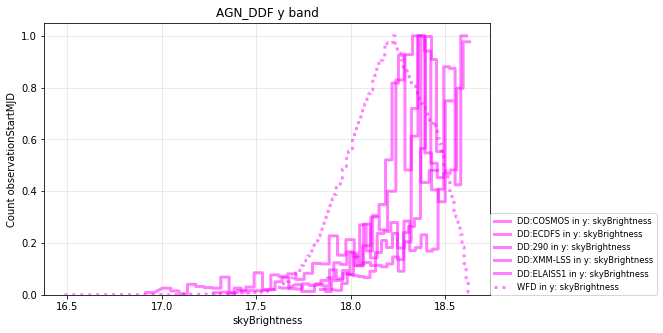

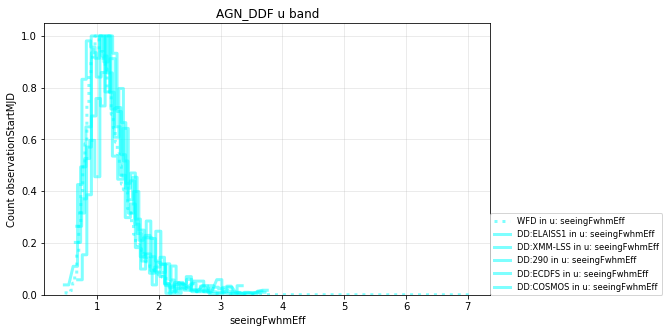

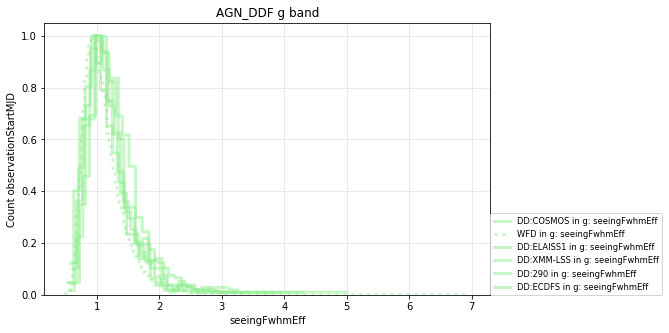

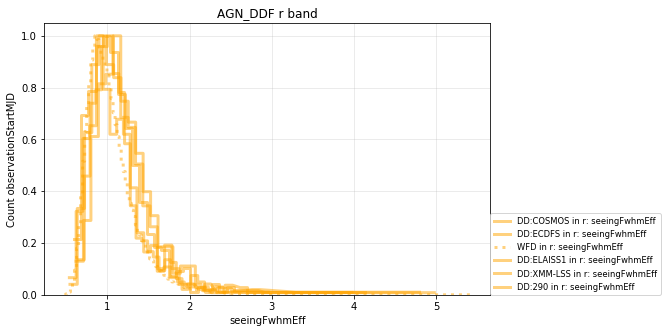

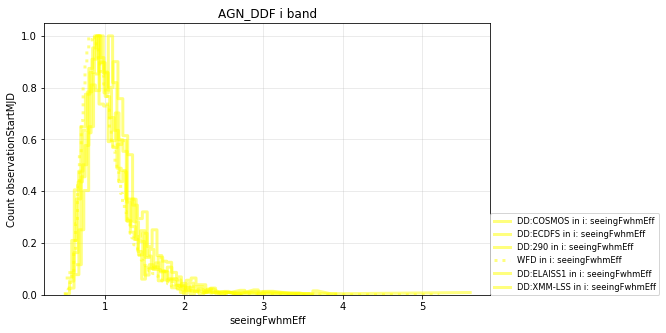

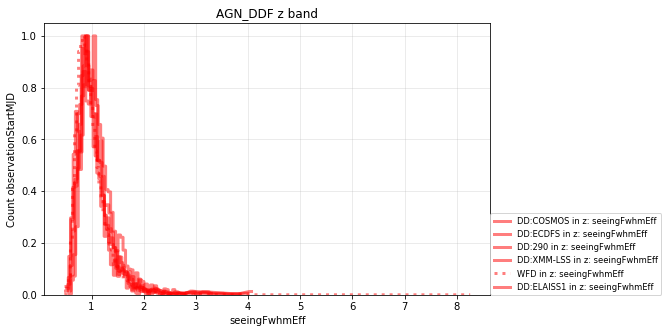

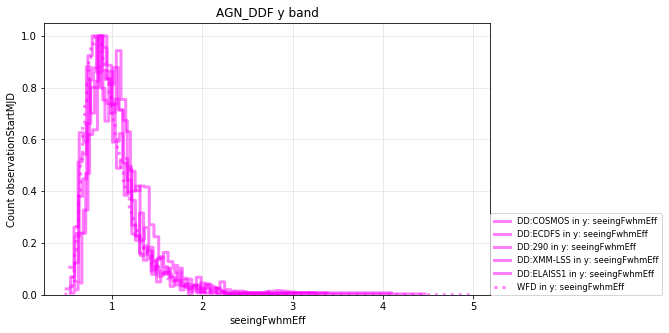

In [81]:
for c in cols:
    for f in filterlist:
        plist = [k for k in bundles.keys() if (f'{f}: {c}' in k)]
        blist = [bundles[p] for p in plist]
        blist.append(wbundles[f'WFD in {f}: {c}'])
        ph.setMetricBundles(blist)
        ph.plot(plotFunc=plots.OneDBinnedData(), 
                plotDicts={'title': f'AGN_DDF {f} band', 'figsize': (8,5), 'legendloc': (1, 0), 
                           'linewidth':3,}, 
                outfileRoot=f'{c}_{f}')